## Real Data Divergence Rates (Eight Calibrations) - Boostrapping Version 2

## 1. All Nodes Divergence Rates

### Data Cleaning and Processing 

In [1]:
import ete3
import re
import os
import subprocess
import inflect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("September_10_2019_Modified_Eight_Calibrations_Gene_PhyloBayes_Posterior_sample.datedist") as f:
    content = f.readlines()
content = [x.strip() for x in content] 

tree = ete3.Tree(content[0],format=1)
tree

Tree node '3123.34' (-0x7fffffdcd0f36d44)

In [3]:
def Remove_Duplicate(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list

In [4]:
leaf_list = []
for leaf in tree.get_leaves():
    leaf_list.append(leaf.name)

In [5]:
leaf_node_list = []
for node in tree.traverse():
    if node.is_leaf():
        leaf_node_list.append(node.name)

In [6]:
def node_age_on_each_tree(tree):
    leaf_node_list = []
    internal_age_list = []
    for node in tree.traverse():
        if node.is_leaf():
            leaf_node_list.append(node.name)
        else:
            internal_age_list.append(node.name)
    return  internal_age_list 

In [7]:
All_Sample_Age_List = []
for i in range (0, len(content)):
    tree = ete3.Tree(content[i],format=1)
    One_Age_List = node_age_on_each_tree(tree)
    All_Sample_Age_List.append(One_Age_List)
df=pd.DataFrame(All_Sample_Age_List)

In [8]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[0:3840] 
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [9]:
3840/0.8

4800.0

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,319,320,321,322,323,324,325,326,327,328
0,3123.34,2755.51,3121.22,2753.11,2570.89,2955.29,2848.07,46.8579,2325.1,1801.27,...,9.0102,8.6528,42.9593,73.3532,92.5573,55.7712,146.577,1.4966,7.4942,4.1806
1,3159.32,2832.13,3153.05,2793.4,2555.59,3061.04,2776.24,36.286,2401.49,2089.6,...,19.9448,8.807,27.4276,122.7,107.87,68.1373,130.409,6.506,8.2003,4.9142
2,3256.26,2848.37,3241.54,2837.62,2359.79,2956.27,2936.61,17.072,2647.36,2080.41,...,19.3945,12.6316,28.3942,81.1108,149.152,50.2577,105.195,3.1224,12.1874,10.4213
3,3052.69,2713.7,3032.22,2672.16,2194.01,2748.94,2835.16,30.0831,2494.48,1775.35,...,30.6429,8.7135,31.6679,113.276,115.783,28.2059,145.119,2.7167,5.3997,3.0389
4,3192.09,2855.25,3173.86,2828.37,2285.68,2998.85,2743.7,20.5183,2643.37,2048.07,...,19.2566,6.476,41.4646,122.299,92.0611,31.3022,128.143,4.2451,3.6805,1.1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,3573.59,3435.68,3249.69,3366.25,3077.8,3100.61,3058.12,39.3123,2844.32,2358.5,...,18.3185,15.0624,18.1485,104.974,143.839,31.9653,145.63,14.492,14.4072,4.862
3836,3264.39,3066.91,2854.48,2980.57,2655.17,2741.39,2731.73,37.2107,2602.87,2306.8,...,72.1142,19.0281,31.4029,186.238,81.7951,50.5435,90.3511,6.9781,12.749,1.799
3837,3243.24,3017.95,2884.26,2875.02,2587.86,2785.23,2430.72,35.5838,2682.96,2049.07,...,53.2721,11.4127,38.3363,109.145,111.359,69.1329,188.342,24.8467,9.2577,4.1579
3838,3152.8,3059.96,2850.68,2823.74,2438.81,2716.8,2734.41,12.6415,2605.66,2003.96,...,31.6963,17.6627,53.5607,111.736,120.19,19.9761,75.1971,11.1059,12.7088,4.2254


### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

In [19]:
# Data here are the slopes computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
slope_array = np.array([0.0004089477, 0.0010468298, 0.0004497527, 0.0030626575, 0.0008683399, 0.0034827923])

whole_slope_array = slope_array

In [20]:
# Data here are the intercepts computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
intercept_array = np.array([-3.0483709, -1.3684021, -2.7591503,  0.6883361, -1.3923985, -0.1524506])

## 2. HGT Divergence Rates

### Data Cleaning and Processing 

In [21]:
with open("September_10_2019_Modified_Eight_Calibrations_Gene_PhyloBayes_Posterior_sample.datedist") as f:
    content = f.readlines()
content = [x.strip() for x in content] 

In [22]:
tree = ete3.Tree(content[0],format=1)
tree

Tree node '3123.34' (-0x7fffffdaf4199448)

In [23]:
def Remove_Duplicate(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list

In [24]:
leaf_list = []
for leaf in tree.get_leaves():
    leaf_list.append(leaf.name)

In [25]:
leaf_node_list = []
for node in tree.traverse():
    if node.is_leaf():
        leaf_node_list.append(node.name)

In [26]:
def node_age_on_each_tree(tree):
    leaf_node_list = []
    internal_age_list = []
    for node in tree.traverse():
        if node.is_leaf():
            leaf_node_list.append(node.name)
        else:
            internal_age_list.append(node.name)
    return internal_age_list 

In [27]:
All_Sample_Age_List = []
for i in range (0, len(content)):
    tree = ete3.Tree(content[i],format=1)
    One_Age_List = node_age_on_each_tree(tree)
    All_Sample_Age_List.append(One_Age_List)
df=pd.DataFrame(All_Sample_Age_List)

In [28]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[0:3840] 
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

## Divergence Rates of all HGT Nodes

### Extract HGT Nodes from the Tree

In [29]:
with open("Labelled-Gene_Tree.treefile") as f:
    content_label_genetree = f.readlines()

In [30]:
reconciliation_gene_tree = ete3.Tree(content_label_genetree[0],format=8)

In [31]:
root = [reconciliation_gene_tree.get_tree_root()]

all_node_TreeInformation = reconciliation_gene_tree.get_descendants()
all_node_TreeInformation = root + all_node_TreeInformation

In [32]:
all_node_TreeInformation

[Tree node 'm1' (-0x7fffffdaf4193438),
 Tree node 'm2' (-0x7fffffdaf4193434),
 Tree node 'm301' (-0x7fffffdaf418ee20),
 Tree node 'm3' (-0x7fffffdaf4193420),
 Tree node 'm230' (-0x7fffffdaf418c4e4),
 Tree node 'm302' (-0x7fffffdaf418fdf0),
 Tree node 'm521' (-0x7fffffdaf32b8470),
 Tree node 'm4' (-0x7fffffdaf4193414),
 Tree node 'm227' (-0x7fffffdaf32bb820),
 Tree node 'm231' (-0x7fffffdaf418c4c4),
 Tree node 'm286' (-0x7fffffdaf418eec8),
 Tree node 'm303' (-0x7fffffdaf418fde8),
 Tree node 'm396' (-0x7fffffdaf418fa80),
 Tree node 'm522' (-0x7fffffdaf32b843c),
 Tree node 'm561' (-0x7fffffdaf32b8bd8),
 Tree node 'm5' (-0x7fffffdaf4193424),
 Tree node 'm100' (-0x7fffffdaf32ba2d0),
 Tree node 'SphingomonasspJJA5_WP072597474' (-0x7fffffdaf418c4dc),
 Tree node 'SphingomonasspJJA5_WP072597460' (-0x7fffffdaf418c4d0),
 Tree node 'm232' (-0x7fffffdaf418c4bc),
 Tree node 'm279' (-0x7fffffdaf418cc0c),
 Tree node 'm287' (-0x7fffffdaf418eec0),
 Tree node 'm292' (-0x7fffffdaf418ee80),
 Tree node 'm30

In [33]:
f = open('all_node_TreeInformation', 'r')
lines = f.read()
all_nodes_age_list = re.findall(r"'(.*?)'", lines)
all_nodes_age_list = [i for i in all_nodes_age_list]

In [34]:
reconciliation_gene_tree.get_leaves()

[Tree node 'Streptomycesfulvoviolaceus_WP043457100' (-0x7fffffdaf41933f4),
 Tree node 'Acidimicrobiaceaebacterium_HAM02975' (-0x7fffffdaf41933f0),
 Tree node 'Mycobacteriumtriplex_WP036469389' (-0x7fffffdaf41933c8),
 Tree node 'Mycobacteriumgenavense_WP025737195' (-0x7fffffdaf41933cc),
 Tree node 'Mycobacteriumconspicuum_WP085231027' (-0x7fffffdaf41933bc),
 Tree node 'Mycobacteriumarosiense_WP083064574' (-0x7fffffdaf41933a8),
 Tree node 'Mycobacteriummarseillense_WP067169648' (-0x7fffffdaf4193394),
 Tree node 'Mycobacteriummarseillense_WP083017212' (-0x7fffffdaf4193384),
 Tree node 'Mycobacteriumpalustre_WP085078461' (-0x7fffffdaf4193378),
 Tree node 'Mycobacteriumsp12747610_WP066975764' (-0x7fffffdaf4193364),
 Tree node 'FrankiaspEUN1f_WP006543802' (-0x7fffffdaf4193334),
 Tree node 'Frankiaasymbiotica_ONH24204' (-0x7fffffdaf4193324),
 Tree node 'Frankiaasymbiotica_WP081438887' (-0x7fffffdaf4193318),
 Tree node 'Cryptosporangiumaurantiacum_WP084742125' (-0x7fffffdaf419330c),
 Tree node

In [35]:
g = open('leaves_children_string', 'r')
lines = g.read()
leaves_nodes_age_list = re.findall(r"'(.*?)'", lines)
leaves_nodes_age_list = [i for i in leaves_nodes_age_list]

In [36]:
all_internal_nodes_list = [x for x in all_nodes_age_list if x not in leaves_nodes_age_list]

In [37]:
HGT_internal_nodes = pd.read_csv('transfer_weights.txt', header=None, delim_whitespace=True)[1]
HGT_internal_nodes_list = HGT_internal_nodes.tolist()
HGT_internal_nodes_list = list(set(HGT_internal_nodes_list))

In [38]:
HGT_nodes_index = [all_nodes_age_list.index(i) for i in HGT_internal_nodes_list]

In [39]:
# Note that if we let HGT_index = a leave index, then what returned 
# by "tree.get_common_ancestor(HGT_internal_node.get_leaf_names())" will be the root of the tree
HGT_node_on_AgeTree_list = []
for HGT_index in HGT_nodes_index: # iterate the index of HGT node on the reconciliation gene tree
    HGT_internal_node = all_node_TreeInformation[HGT_index] # get ihe information of the HGT node on the reconciliation gene tree
    HGT_internal_node_ancestor = HGT_internal_node.get_leaf_names() # get the leave descendants of this HGT node
    HGT_node_on_AgeTree = tree.get_common_ancestor(HGT_internal_node_ancestor) # use leave descendants of this HGT node to get the HGT node information on the "age tree"\
    HGT_node_on_AgeTree_list.append(HGT_node_on_AgeTree)

In [40]:
a = open('whole_HGT_node_on_AgeTree_list', 'r')
lines = a.read() 
HGT_age_list_row_one = re.findall(r"'(\d+\.\d+|\d+)'", lines)
#HGT_age_list_row_one = [float(i) for i in HGT_age_list_row_one]

In [41]:
AgeTree_first_row = df.iloc[0,:].tolist()

In [68]:
HGT_nodes_index_on_AgeTree = [AgeTree_first_row.index(i) for i in HGT_age_list_row_one]

In [69]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[HGT_nodes_index_on_AgeTree]
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [70]:
min_gae_HGT_age = np.min(negative_age_list_1)
min_gae_HGT_age  

-3968.66

## Divergence Rates of SAR202 Nodes

In [45]:
with open("September_10_2019_Modified_Eight_Calibrations_Gene_PhyloBayes_Posterior_sample.datedist") as f:
    content = f.readlines()
content = [x.strip() for x in content] 

In [46]:
tree = ete3.Tree(content[0],format=1)

In [47]:
def Remove_Duplicate(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list

In [48]:
leaf_list = []
for leaf in tree.get_leaves():
    leaf_list.append(leaf.name)

In [49]:
leaf_node_list = []
for node in tree.traverse():
    if node.is_leaf():
        leaf_node_list.append(node.name)

In [50]:
def node_age_on_each_tree(tree):
    leaf_node_list = []
    internal_age_list = []
    for node in tree.traverse():
        if node.is_leaf():
            leaf_node_list.append(node.name)
        else:
            internal_age_list.append(node.name)
    return internal_age_list 

In [51]:
All_Sample_Age_List = []
for i in range (0, len(content)):
    tree = ete3.Tree(content[i],format=1)
    One_Age_List = node_age_on_each_tree(tree)
    All_Sample_Age_List.append(One_Age_List)
df=pd.DataFrame(All_Sample_Age_List)

In [52]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[0:3840] 
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

### Extract SAR202 Species from the Tree

In [48]:
tree = ete3.Tree(content[0],format=1)
print (tree)


                  /-Streptomycesfulvoviolaceus_WP043457100
                 |
                 |   /-Acidimicrobiaceaebacterium_HAM02975
                 |  |
               /-|  |               /-Mycobacteriumtriplex_WP036469389
              |  |  |            /-|
              |  |  |         /-|   \-Mycobacteriumgenavense_WP025737195
              |  |  |        |  |
              |   \-|      /-|   \-Mycobacteriumconspicuum_WP085231027
              |     |     |  |
              |     |     |  |   /-Mycobacteriumarosiense_WP083064574
              |     |     |   \-|
              |     |   /-|     |   /-Mycobacteriummarseillense_WP067169648
              |     |  |  |      \-|
              |     |  |  |         \-Mycobacteriummarseillense_WP083017212
              |      \-|  |
              |        |   \-Mycobacteriumpalustre_WP085078461
              |        |
              |         \-Mycobacteriumsp12747610_WP066975764
              |
              |               /-Fran

In [49]:
SAR202_clade = tree.get_common_ancestor(['SAR202clusterbacteriumIo17ChloroG3_PKB65232', 'SAR202clusterbacteriumIo17ChloroG9_PKB79601'])

In [50]:
children = SAR202_clade.get_descendants()

In [51]:
# Append the crown SAR202 to the children list
children.append(SAR202_clade) 

In [52]:
f = open('Age_Tree_SAR202-Clade_string', 'r')
lines = f.read()
SAR202_age_list_row_one = re.findall(r"'(\d+\.\d+|\d+)'", lines) 
SAR202_age_list_row_one = [float(i) for i in SAR202_age_list_row_one]

In [53]:
df_list_row_one = df.iloc[0]
df_list_row_one = df_list_row_one.values.tolist()
df_list_row_one = [float(i) for i in df_list_row_one]

In [54]:
Internal_node_SAR202_clade_list = []
for element in SAR202_age_list_row_one:
    if element in df_list_row_one:
        Internal_node_SAR202_clade_list.append(df_list_row_one.index(element))

In [55]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[Internal_node_SAR202_clade_list]
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [56]:
min_gae_SAR202_age = np.min(negative_age_list_1)
min_gae_SAR202_age  

-2755.86

### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

In [57]:
bin_size = 100

In [62]:
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])
his_data_eight_calibration_1 = np.histogram(negative_age_list_1, bins=int(2400/bin_size), range = (-2400, 0))
age_interval_list = his_data_eight_calibration_1[1]
age_interval_list = age_interval_list.tolist()
middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
del middle_age_interval_list[-1]
node_number_each_interval = his_data_eight_calibration_1[0]
node_number_each_interval = node_number_each_interval.tolist()
node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_1)) for i in node_number_each_interval]
node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]

In [63]:
a = np.asarray(node_density_each_interval_normalized_by_tree_number) * 100
np.sum(a) 

34.96822916666667

In [64]:
SAR202_middle_age_interval_list = np.linspace(-2400, -100, 24)
SAR202_middle_age_interval_list 

array([-2400., -2300., -2200., -2100., -2000., -1900., -1800., -1700.,
       -1600., -1500., -1400., -1300., -1200., -1100., -1000.,  -900.,
        -800.,  -700.,  -600.,  -500.,  -400.,  -300.,  -200.,  -100.])

No handles with labels found to put in legend.


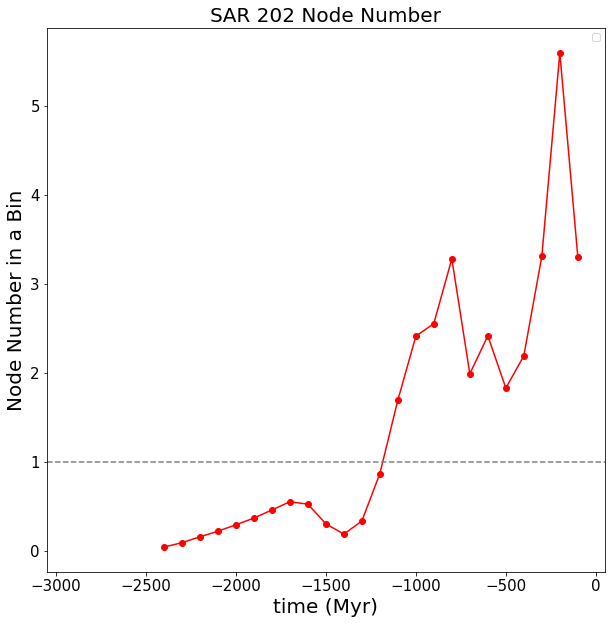

In [65]:
plt.subplots(1, 1, figsize=(10, 10))
plt.plot(SAR202_middle_age_interval_list, a, 'o', color='red')
plt.plot(SAR202_middle_age_interval_list, a, '-', color='red')
plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('Node Number in a Bin', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('SAR 202 Node Number',  size = '20')
plt.axhline(y=1., color='grey', linestyle='--', alpha = 1)
plt.savefig('SAR 202 Node Number.jpg')
plt.show()

# Divergence Rates WITHOUT All HGT Nodes and WITHOUT SAR202 Clade Nodes

In [71]:
nodes_NonHGT_and_NonSAR202_column_index =  Internal_node_SAR202_clade_list + HGT_nodes_index_on_AgeTree

In [72]:
# Remove the duplicates in the list "nodes_NonHGT_and_NonSAR202_column_index"
NoDuplicates_nodes_NonHGT_and_NonSAR202_column_index = list(set(nodes_NonHGT_and_NonSAR202_column_index))

In [73]:
nodes_NonHGT_and_NonSAR202 = df.drop(df.columns[NoDuplicates_nodes_NonHGT_and_NonSAR202_column_index], axis=1) 

In [74]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = nodes_NonHGT_and_NonSAR202
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [75]:
min_nodes_NonHGT_and_NonSAR202_age = np.min(negative_age_list_1)
min_nodes_NonHGT_and_NonSAR202_age  ### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

-4101.45

# Divergence Rates of all HGT Nodes with 80% confidence and at least one non-leaf recipient

### Extract HGT Nodes from the Tree

In [76]:
with open("September_10_2019_Modified_Eight_Calibrations_Gene_PhyloBayes_Posterior_sample.datedist") as f:
    content = f.readlines()
content = [x.strip() for x in content] 

tree = ete3.Tree(content[0],format=1)
tree

Tree node '3123.34' (-0x7fffffdcd7c5f764)

In [77]:
with open("Labelled-Gene_Tree.treefile") as f:
    content = f.readlines()

In [78]:
reconciliation_gene_tree = ete3.Tree(content[0],format=8)

In [81]:
print (reconciliation_gene_tree)


                  /-Streptomycesfulvoviolaceus_WP043457100
                 |
                 |   /-Acidimicrobiaceaebacterium_HAM02975
                 |  |
               /-|  |               /-Mycobacteriumtriplex_WP036469389
              |  |  |            /-|
              |  |  |         /-|   \-Mycobacteriumgenavense_WP025737195
              |  |  |        |  |
              |   \-|      /-|   \-Mycobacteriumconspicuum_WP085231027
              |     |     |  |
              |     |     |  |   /-Mycobacteriumarosiense_WP083064574
              |     |     |   \-|
              |     |   /-|     |   /-Mycobacteriummarseillense_WP067169648
              |     |  |  |      \-|
              |     |  |  |         \-Mycobacteriummarseillense_WP083017212
              |      \-|  |
              |        |   \-Mycobacteriumpalustre_WP085078461
              |        |
              |         \-Mycobacteriumsp12747610_WP066975764
              |
              |               /-Fran

In [82]:
root = [reconciliation_gene_tree.get_tree_root()]

all_node_TreeInformation = reconciliation_gene_tree.get_descendants()
all_node_TreeInformation = root + all_node_TreeInformation

In [83]:
all_node_TreeInformation

[Tree node 'm1' (-0x7fffffdcd7b1a8b8),
 Tree node 'm2' (-0x7fffffdcd7b1a8dc),
 Tree node 'm301' (-0x7fffffdcd7c62b80),
 Tree node 'm3' (-0x7fffffdcd7b1a8f0),
 Tree node 'm230' (-0x7fffffdcd02cdaf4),
 Tree node 'm302' (-0x7fffffdcd7c33760),
 Tree node 'm521' (-0x7fffffdcd7b2ab0c),
 Tree node 'm4' (-0x7fffffdcd7b1a828),
 Tree node 'm227' (-0x7fffffdcd7b2f270),
 Tree node 'm231' (-0x7fffffdcd02cda44),
 Tree node 'm286' (-0x7fffffdcd7b0bca8),
 Tree node 'm303' (-0x7fffffdcd7c3375c),
 Tree node 'm396' (-0x7fffffdcd7b2dd1c),
 Tree node 'm522' (-0x7fffffdcd7c35fec),
 Tree node 'm561' (-0x7fffffdcd7b1bc20),
 Tree node 'm5' (-0x7fffffdcd7b1a8c0),
 Tree node 'm100' (-0x7fffffdcd7b23e5c),
 Tree node 'SphingomonasspJJA5_WP072597474' (-0x7fffffdcd02cdae8),
 Tree node 'SphingomonasspJJA5_WP072597460' (-0x7fffffdcd02cda2c),
 Tree node 'm232' (-0x7fffffdcd02cda68),
 Tree node 'm279' (-0x7fffffdcd7b10eb0),
 Tree node 'm287' (-0x7fffffdcd7b0bc08),
 Tree node 'm292' (-0x7fffffdcd7b0bcb4),
 Tree node 'm30

In [84]:
root = [reconciliation_gene_tree.get_tree_root()]
f = open('all_node_TreeInformation', 'r')
lines = f.read()
all_nodes_age_list = re.findall(r"'(.*?)'", lines)
all_nodes_age_list = [i for i in all_nodes_age_list]
all_nodes_age_list.insert(0,'m1')

In [85]:
all_nodes_age_list.remove(all_nodes_age_list[0])

In [86]:
reconciliation_gene_tree.get_leaves()

[Tree node 'Streptomycesfulvoviolaceus_WP043457100' (-0x7fffffdcd7b1a824),
 Tree node 'Acidimicrobiaceaebacterium_HAM02975' (-0x7fffffdcd7b1a86c),
 Tree node 'Mycobacteriumtriplex_WP036469389' (-0x7fffffdcd7b28b78),
 Tree node 'Mycobacteriumgenavense_WP025737195' (-0x7fffffdcd7b28bd0),
 Tree node 'Mycobacteriumconspicuum_WP085231027' (-0x7fffffdcd7b28b04),
 Tree node 'Mycobacteriumarosiense_WP083064574' (-0x7fffffdcd7b28b7c),
 Tree node 'Mycobacteriummarseillense_WP067169648' (-0x7fffffdcd7b28b4c),
 Tree node 'Mycobacteriummarseillense_WP083017212' (-0x7fffffdcd7b28bd8),
 Tree node 'Mycobacteriumpalustre_WP085078461' (-0x7fffffdcd7b28be0),
 Tree node 'Mycobacteriumsp12747610_WP066975764' (-0x7fffffdcd7b28bf0),
 Tree node 'FrankiaspEUN1f_WP006543802' (-0x7fffffdcd7b2c95c),
 Tree node 'Frankiaasymbiotica_ONH24204' (-0x7fffffdcd7b2c9b0),
 Tree node 'Frankiaasymbiotica_WP081438887' (-0x7fffffdcd7b2c9d0),
 Tree node 'Cryptosporangiumaurantiacum_WP084742125' (-0x7fffffdcd7b2c934),
 Tree node

In [87]:
g = open('leaves_children_string', 'r')
lines = g.read()
leaves_nodes_age_list = re.findall(r"'(.*?)'", lines)
leaves_nodes_age_list = [i for i in leaves_nodes_age_list]

In [88]:
all_internal_nodes_list = [x for x in all_nodes_age_list if x not in leaves_nodes_age_list]
len(all_internal_nodes_list)

329

In [89]:
# all HGT Nodes with 80% confidence and at least one non-leaf recipient
HighConfidence_HGT_internal_nodes_list = ['m108', 'm171', 'm301', 'm309', 'm316', 'm401', 'm413', 'm417', 'm49', 'm522', 
                      'm550', 'm561', 'm564', 'm584', 'm625', 'm626', 'm81', 'm85', 'm10',
                     'm101', 'm104', 'm117', 'm118', 'm12', 'm124', 'm13', 'm140', 'm144', 'm149',
                     'm150', 'm157', 'm164', 'm166', 'm209', 'm210', 'm232', 'm240', 'm247', 'm25',
                     'm254', 'm26', 'm27', 'm272', 'm3', 'm304', 'm333', 'm336', 'm337', 'm338',
                     'm339', 'm345', 'm346', 'm370', 'm371', 'm397', 'm398', 'm41', 'm42', 'm44',
                      'm450', 'm452', 'm563', 'm579', 'm619', 'm637', 'm645', 'm646', 'm71', 'm8']

In [90]:
HighConfidence_HGT_nodes_index = [all_nodes_age_list.index(i) for i in HighConfidence_HGT_internal_nodes_list]
np.array(HighConfidence_HGT_nodes_index)

array([358, 566,   2, 243, 374, 191, 128, 385, 484,  13,  87,  14,  89,
        52, 154, 213, 285, 489,  98,  33, 163, 288, 359, 215, 428, 277,
       361, 432, 362, 433, 506, 435, 565,  60, 105,  19, 174,  64,  32,
       177,  57,  99,  36,   3,  23,  76, 247, 303, 375, 453, 523, 571,
       188, 251,  25,  45, 222, 281, 350, 258, 389,  51,  90, 335, 411,
       342, 413, 102,  56])

In [91]:
# Note that if we let HGT_index = a leave index, then what returned 
# by "tree.get_common_ancestor(HGT_internal_node.get_leaf_names())" will be the root of the tree
HighConfidence_HGT_node_on_AgeTree_list = []
for HGT_index in HighConfidence_HGT_nodes_index: # iterate the index of HGT node on the reconciliation gene tree
    HGT_internal_node = all_node_TreeInformation[HGT_index] # get ihe information of the HGT node on the reconciliation gene tree
    HGT_internal_node_ancestor = HGT_internal_node.get_leaf_names() # get the leave descendants of this HGT node
    HGT_node_on_AgeTree = tree.get_common_ancestor(HGT_internal_node_ancestor) # use leave descendants of this HGT node to get the HGT node information on the "age tree"
    HighConfidence_HGT_node_on_AgeTree_list.append(HGT_node_on_AgeTree)

In [92]:
a = open('80Confidence_HGT_node_on_AgeTree_list', 'r')
lines = a.read()
HGT_age_list_row_one = re.findall(r"'(\d+\.\d+|\d+)'", lines)
#HGT_age_list_row_one = [float(i) for i in HGT_age_list_row_one]

In [93]:
AgeTree_first_row = df.iloc[0,:].tolist()

In [94]:
HighConfidence_HGT_nodes_index_on_AgeTree = [AgeTree_first_row.index(i) for i in HGT_age_list_row_one]

In [95]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[HighConfidence_HGT_nodes_index_on_AgeTree]
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [96]:
min_gae_HGT_age = np.min(negative_age_list_1)
min_gae_HGT_age  

-3968.66

# Divergence Rates WITHOUT High Confidence HGT Nodes and WITHOUT SAR202 Clade Nodes

In [97]:
nodes_HighConfidence_HGT_and_SAR202_column_index =  Internal_node_SAR202_clade_list + HighConfidence_HGT_nodes_index_on_AgeTree

In [98]:
# Remove the duplicates in the list "nodes_HGT_and_SAR202_column_index"
NoDuplicates_nodes_HighConfidenceHGT_and_SAR202_column_index = list(set(nodes_HighConfidence_HGT_and_SAR202_column_index))

In [99]:
nodes_NonHighConfidenceHGT_and_NonSAR202 = df.drop(df.columns[NoDuplicates_nodes_HighConfidenceHGT_and_SAR202_column_index], axis=1) 

In [100]:
All_Nodes_Index_List = [i for i in range(0, 329)]
NonHighConfidenceHGT_and_NonSAR202_column_index = [x for x in All_Nodes_Index_List if x not in NoDuplicates_nodes_HighConfidenceHGT_and_SAR202_column_index]

In [101]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = nodes_NonHighConfidenceHGT_and_NonSAR202
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [102]:
min_nodes_NonHGT_and_NonSAR202_age = np.min(negative_age_list_1)
min_nodes_NonHGT_and_NonSAR202_age  ### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

-4101.45

### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

## Growth Rates of All Nodes on the Age Tree

In [103]:
tree_solution_index = np.linspace(0, 3839, 3840).tolist()
tree_solution_index_list = [int(i) for i in tree_solution_index]

In [ ]:
SAR2020_all_log_density_list = []
SAR2020_all_average_node_density_list = []
HGT_all_log_density_list = []
HGT_all_average_node_density_list = []
nonBoth_all_log_density_list = []
nonBoth_all_average_node_density_list = []
AllNodes_all_log_density_list = []
AllNodes_all_average_node_density_list = []

for l in range(0, 2):
    index_bootstrapping_values_one_round = np.random.choice(tree_solution_index_list, size=len(tree_solution_index_list), replace=True)
    df_bootstrap = df.loc[index_bootstrapping_values_one_round]
    
    df_list_1  = df_bootstrap.loc[:,Internal_node_SAR202_clade_list]
    df_list_1  = df_list_1.values.tolist()
    merged_df_list_1 = sum(df_list_1, [])
    cleaned_df_list_1 = [float(x) for x in merged_df_list_1]
    negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])
    his_data_eight_calibration_1 = np.histogram(negative_age_list_1, bins=int(2700/bin_size), range = (-2700, 0))
    age_interval_list = his_data_eight_calibration_1[1]
    age_interval_list = age_interval_list.tolist()
    middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
    del middle_age_interval_list[-1]
    node_number_each_interval = his_data_eight_calibration_1[0]
    node_number_each_interval = node_number_each_interval.tolist()
    node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_1)) for i in node_number_each_interval]
    node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]
    SAR2020_all_average_node_density_list.append(node_density_each_interval_normalized_by_tree_number)
    log_node_density_each_interval_normalized_by_tree_number = [np.log(i) for i in node_density_each_interval_normalized_by_tree_number]
    SAR2020_all_log_density_list.append(log_node_density_each_interval_normalized_by_tree_number)
    
    df_list_2  = df_bootstrap.loc[:,HighConfidence_HGT_nodes_index_on_AgeTree] 
    df_list_2 = df_list_2.values.tolist()
    merged_df_list_2 = sum(df_list_2, [])
    cleaned_df_list_2 = [float(x) for x in merged_df_list_2]
    negative_age_list_2 = sorted([-x for x in cleaned_df_list_2])
    his_data_eight_calibration_2 = np.histogram(negative_age_list_2, bins=int(3000/bin_size), range = (-3000, 0))
    age_interval_list = his_data_eight_calibration_2[1]
    age_interval_list = age_interval_list.tolist()
    middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
    del middle_age_interval_list[-1]
    node_number_each_interval = his_data_eight_calibration_2[0]
    node_number_each_interval = node_number_each_interval.tolist()
    node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_1)) for i in node_number_each_interval]
    node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]
    HGT_all_average_node_density_list.append(node_density_each_interval_normalized_by_tree_number)
    log_node_density_each_interval_normalized_by_tree_number = [np.log(i) for i in node_density_each_interval_normalized_by_tree_number]
    HGT_all_log_density_list.append(log_node_density_each_interval_normalized_by_tree_number)
    
    df_list_3  = df_bootstrap.loc[:,NonHighConfidenceHGT_and_NonSAR202_column_index]
    df_list_3 = df_list_3.values.tolist()
    merged_df_list_3 = sum(df_list_3, [])
    cleaned_df_list_3 = [float(x) for x in merged_df_list_3]
    negative_age_list_3 = sorted([-x for x in cleaned_df_list_3])
    his_data_eight_calibration_3 = np.histogram(negative_age_list_3, bins=int(3000/bin_size), range = (-3000, 0))
    age_interval_list = his_data_eight_calibration_3[1]
    age_interval_list = age_interval_list.tolist()
    middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
    del middle_age_interval_list[-1]
    node_number_each_interval = his_data_eight_calibration_3[0]
    node_number_each_interval = node_number_each_interval.tolist()
    node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_1)) for i in node_number_each_interval]
    node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]
    nonBoth_all_average_node_density_list.append(node_density_each_interval_normalized_by_tree_number)
    log_node_density_each_interval_normalized_by_tree_number = [np.log(i) for i in node_density_each_interval_normalized_by_tree_number]
    nonBoth_all_log_density_list.append(log_node_density_each_interval_normalized_by_tree_number)
    
    df_list_4 = df_bootstrap
    df_list_4 = df_list_4.values.tolist()
    merged_df_list_4 = sum(df_list_4, [])
    cleaned_df_list_4 = [float(x) for x in merged_df_list_4]
    negative_age_list_4 = sorted([-x for x in cleaned_df_list_4])
    his_data_eight_calibration_4 = np.histogram(negative_age_list_4, bins=int(3000/bin_size), range = (-3000, 0))
    age_interval_list = his_data_eight_calibration_4[1]
    age_interval_list = age_interval_list.tolist()
    middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
    del middle_age_interval_list[-1]
    node_number_each_interval = his_data_eight_calibration_4[0]
    node_number_each_interval = node_number_each_interval.tolist()
    node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_1)) for i in node_number_each_interval]
    node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]
    AllNodes_all_average_node_density_list.append(node_density_each_interval_normalized_by_tree_number)
    log_node_density_each_interval_normalized_by_tree_number = [np.log(i) for i in node_density_each_interval_normalized_by_tree_number]
    AllNodes_all_log_density_list.append(log_node_density_each_interval_normalized_by_tree_number)
    
    print (l)

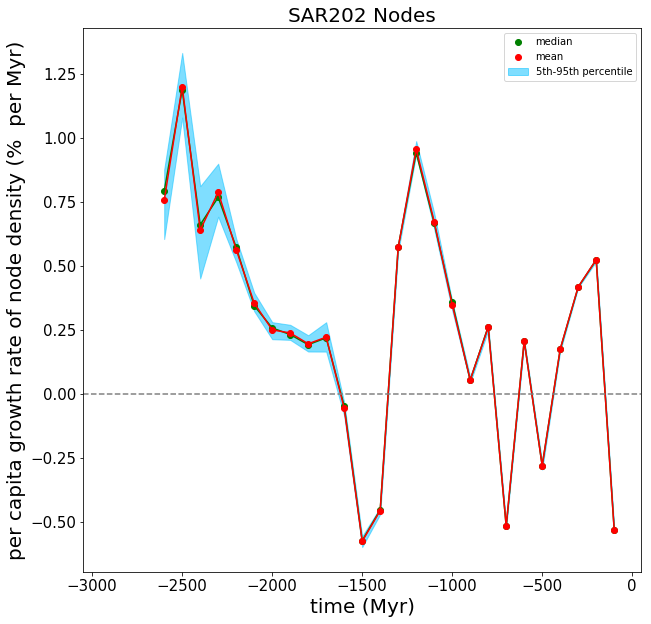

In [103]:
SAR202all_AllLogDensity_DataFrame = pd.DataFrame(np.array(SAR2020_all_log_density_list))
SAR202_nonNANandINF_index = np.isinf(SAR202all_AllLogDensity_DataFrame).any(1).tolist()

SAR202_nonNANandINF_index = np.isinf(SAR202all_AllLogDensity_DataFrame).any(1).tolist()
SAR202_nonNANandINF_index_list = []
for i in range (0, len(SAR202_nonNANandINF_index)):
    if SAR202_nonNANandINF_index[i] == False:
        SAR202_nonNANandINF_index_list.append(i)
        
SAR202NodeDensity_nonNANandINF_DataFrame = SAR202all_AllLogDensity_DataFrame.loc[SAR202_nonNANandINF_index_list]

SAR202_middle_age_interval_list = np.linspace(-2600, -100, 26)

SAR202Rate_list = []
SAR202Rate_Mean_list = []
SAR202Rate_STD_list = []
SAR202Rate_Median_list = []
SAR202Rate_Confidence_UpperBound_list = []
SAR202Rate_Confidence_LowerBound_list = []
for i in range(0,26):
    SAR202Rate = (SAR202NodeDensity_nonNANandINF_DataFrame[i+1] - SAR202NodeDensity_nonNANandINF_DataFrame[i]) / bin_size *100
    SAR202Rate_list.append(SAR202Rate)
    SAR202Rate_Mean_list.append(SAR202Rate.mean())
    SAR202Rate_STD_list.append(SAR202Rate.std())
    SAR202Rate_Median_list.append(SAR202Rate.median())
    SAR202Rate_Confidence_UpperBound_list.append(SAR202Rate.quantile(0.9))
    SAR202Rate_Confidence_LowerBound_list.append(SAR202Rate.quantile(0.1))
    
plt.subplots(1, 1, figsize=(10, 10))
plt.plot(SAR202_middle_age_interval_list, SAR202Rate_Median_list, '-', color='green')
plt.plot(SAR202_middle_age_interval_list, SAR202Rate_Median_list,  'o', color='green', label="median")
plt.plot(SAR202_middle_age_interval_list, SAR202Rate_Mean_list, '-', color='red')
plt.plot(SAR202_middle_age_interval_list, SAR202Rate_Mean_list,  'o', color='red', label="mean")
plt.fill_between(SAR202_middle_age_interval_list, SAR202Rate_Confidence_LowerBound_list, SAR202Rate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('SAR202 Nodes',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
plt.show()

In [114]:
HighConfidenceNodeDensity_DataFrame

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-5.366195,-5.280252,-5.415319,-5.632916,-5.562663,-5.202534,-4.837142,-4.672769,-4.681725,-4.833209,...,-3.475702,-3.569431,-3.263816,-3.266544,-2.905501,-2.925157,-2.676029,-2.524883,-2.535016,-4.038289
1,-5.365638,-5.256995,-5.445634,-5.640221,-5.643158,-5.196871,-4.833209,-4.664445,-4.719833,-4.783749,...,-3.452162,-3.567400,-3.272845,-3.269758,-2.903837,-2.932464,-2.673385,-2.526412,-2.529054,-4.032544
2,-5.373468,-5.294159,-5.399635,-5.617032,-5.566061,-5.213478,-4.842410,-4.660859,-4.669709,-4.808332,...,-3.471251,-3.583206,-3.255205,-3.261232,-2.904075,-2.936727,-2.675424,-2.526836,-2.535378,-4.037403
3,-5.385329,-5.303539,-5.376842,-5.656482,-5.603513,-5.205852,-4.833536,-4.667212,-4.699595,-4.822148,...,-3.464570,-3.585928,-3.258044,-3.276356,-2.897632,-2.929194,-2.675122,-2.525826,-2.532424,-4.032250


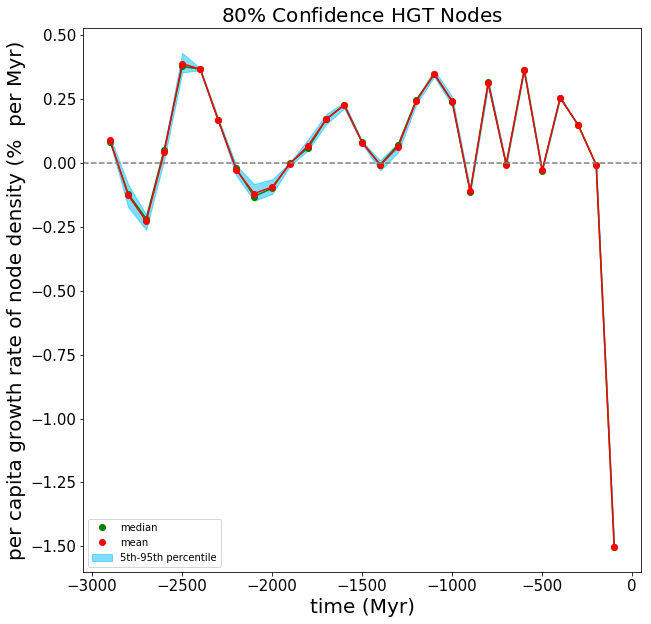

In [113]:
HighConfidenceNodeDensity_DataFrame = pd.DataFrame(np.array(HGT_all_log_density_list))
HighConfidenceNodeDensity_nonNANandINF_index = np.isinf(HighConfidenceNodeDensity_DataFrame).any(1).tolist()

HighConfidenceNodeDensity_nonNANandINF_index_list = []
for i in range (0, len(HighConfidenceNodeDensity_nonNANandINF_index)):
    if HighConfidenceNodeDensity_nonNANandINF_index[i] == False:
        HighConfidenceNodeDensity_nonNANandINF_index_list.append(i)
        
HighConfidenceNodeDensity_nonNANandINF_DataFrame = HighConfidenceNodeDensity_DataFrame.loc[HighConfidenceNodeDensity_nonNANandINF_index_list]

HighConfidenceRate_list = []
HighConfidenceRate_Mean_list = []
HighConfidenceRate_STD_list = []
HighConfidenceRate_Median_list = []
HighConfidenceRate_Confidence_UpperBound_list = []
HighConfidenceRate_Confidence_LowerBound_list = []
for i in range(0,29):
    HighConfidenceRate = (HighConfidenceNodeDensity_nonNANandINF_DataFrame[i+1] - HighConfidenceNodeDensity_nonNANandINF_DataFrame[i]) / bin_size *100
    HighConfidenceRate_list.append(HighConfidenceRate)
    HighConfidenceRate_Mean_list.append(HighConfidenceRate.mean())
    HighConfidenceRate_STD_list.append(HighConfidenceRate.std())
    HighConfidenceRate_Median_list.append(HighConfidenceRate.median())
    HighConfidenceRate_Confidence_UpperBound_list.append(HighConfidenceRate.quantile(0.9))
    HighConfidenceRate_Confidence_LowerBound_list.append(HighConfidenceRate.quantile(0.1))
    
HighConfidence_middle_age_interval_list = np.linspace(-2900, -100, 29)
HighConfidence_middle_age_interval_list

plt.subplots(1, 1, figsize=(10, 10))
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Median_list, '-', color='green')
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Median_list,  'o', color='green', label="median")
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Mean_list, '-', color='red')
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Mean_list,  'o', color='red', label="mean")
plt.fill_between(HighConfidence_middle_age_interval_list, HighConfidenceRate_Confidence_LowerBound_list, HighConfidenceRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('$80\%$ Confidence HGT Nodes',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
plt.show()

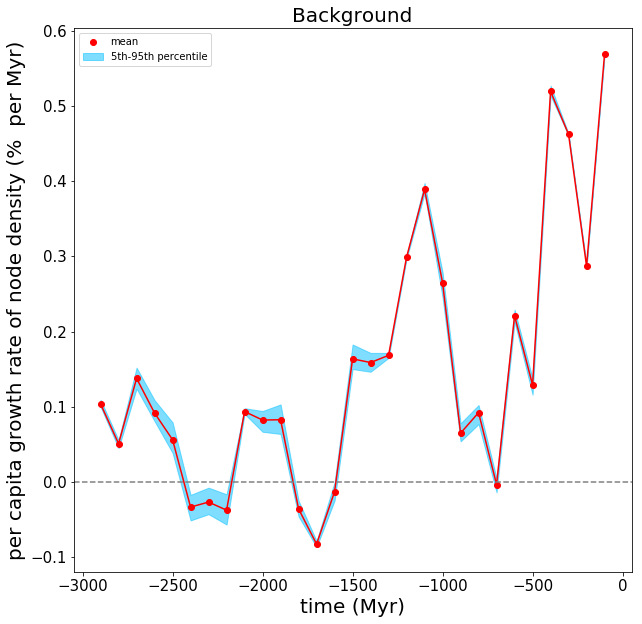

In [105]:
NonBoth_middle_age_interval_list = np.linspace(-2900, -100, 29)

NonBothNodeDensity_DataFrame = pd.DataFrame(np.array(nonBoth_all_log_density_list))

NonBothNodeDensity_nonNANandINF_index = np.isinf(NonBothNodeDensity_DataFrame).any(1).tolist()
NonBothNodeDensity_nonNANandINF_index_list = []
for i in range (0, len(NonBothNodeDensity_nonNANandINF_index)):
    if NonBothNodeDensity_nonNANandINF_index[i] == False:
        NonBothNodeDensity_nonNANandINF_index_list.append(i)
        
NonBothNodeDensity_nonNANandINF_DataFrame = NonBothNodeDensity_DataFrame.loc[NonBothNodeDensity_nonNANandINF_index_list]

NonBothRate_list = []
NonBothRate_Mean_list = []
NonBothRate_STD_list = []
NonBothRate_Median_list = []
NonBothRate_Confidence_UpperBound_list = []
NonBothRate_Confidence_LowerBound_list = []
for i in range(0,29):
    NonBothRate = (NonBothNodeDensity_nonNANandINF_DataFrame[i+1] - NonBothNodeDensity_nonNANandINF_DataFrame[i]) / bin_size *100
    NonBothRate_list.append(NonBothRate)
    NonBothRate_Mean_list.append(NonBothRate.mean())
    NonBothRate_STD_list.append(NonBothRate.std())
    NonBothRate_Median_list.append(NonBothRate.median())
    NonBothRate_Confidence_UpperBound_list.append(NonBothRate.quantile(0.9))
    NonBothRate_Confidence_LowerBound_list.append(NonBothRate.quantile(0.1))

plt.subplots(1, 1, figsize=(10, 10))
plt.plot(NonBoth_middle_age_interval_list, NonBothRate_Mean_list, '-', color='red')
plt.plot(NonBoth_middle_age_interval_list, NonBothRate_Mean_list, 'o', color='red', label="mean")
plt.fill_between(NonBoth_middle_age_interval_list, NonBothRate_Confidence_LowerBound_list, NonBothRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Background',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
plt.show()

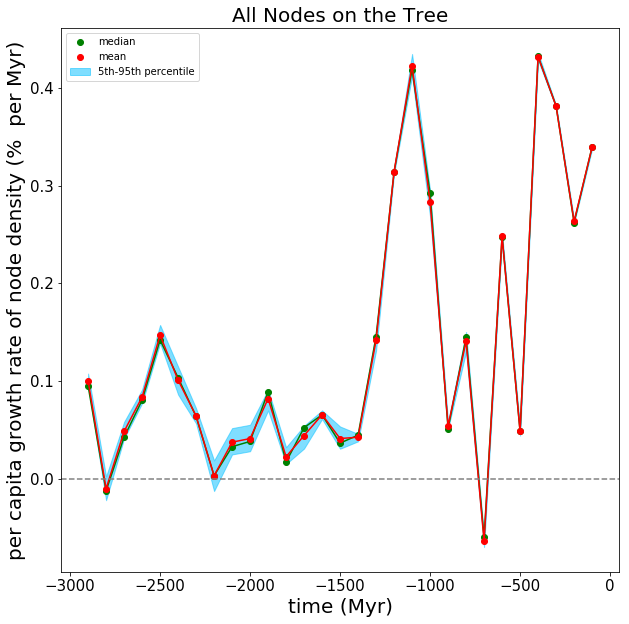

In [106]:
AllNodeDensity_DataFrame = pd.DataFrame(np.array(AllNodes_all_log_density_list))
AllNodeDensity_nonNANandINF_index = np.isinf(AllNodeDensity_DataFrame).any(1).tolist()

AllNodeDensity_nonNANandINF_index_list = []
for i in range (0, len(AllNodeDensity_nonNANandINF_index)):
    if AllNodeDensity_nonNANandINF_index[i] == False:
        AllNodeDensity_nonNANandINF_index_list.append(i)
        
AllNodeDensity_nonNANandINF_DataFrame = AllNodeDensity_DataFrame.loc[AllNodeDensity_nonNANandINF_index_list]

AllRate_list = []
AllRate_Mean_list = []
AllRate_STD_list = []
AllRate_Median_list = []
AllRate_Confidence_UpperBound_list = []
AllRate_Confidence_LowerBound_list = []
for i in range(0,29):
    AllRate = (AllNodeDensity_nonNANandINF_DataFrame[i+1] - AllNodeDensity_nonNANandINF_DataFrame[i]) / bin_size *100
    AllRate_list.append(AllRate)
    AllRate_Mean_list.append(AllRate.mean())
    AllRate_STD_list.append(AllRate.std())
    AllRate_Median_list.append(AllRate.median())
    AllRate_Confidence_UpperBound_list.append(AllRate.quantile(0.9))
    AllRate_Confidence_LowerBound_list.append(AllRate.quantile(0.1))
    
plt.subplots(1, 1, figsize=(10, 10))
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Median_list, '-', color='green')
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Median_list,  'o', color='green', label="median")
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Mean_list, '-', color='red')
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Mean_list,  'o', color='red', label="mean")
plt.fill_between(HighConfidence_middle_age_interval_list, AllRate_Confidence_LowerBound_list, AllRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('All Nodes on the Tree',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
plt.show()

<Figure size 1080x2160 with 0 Axes>

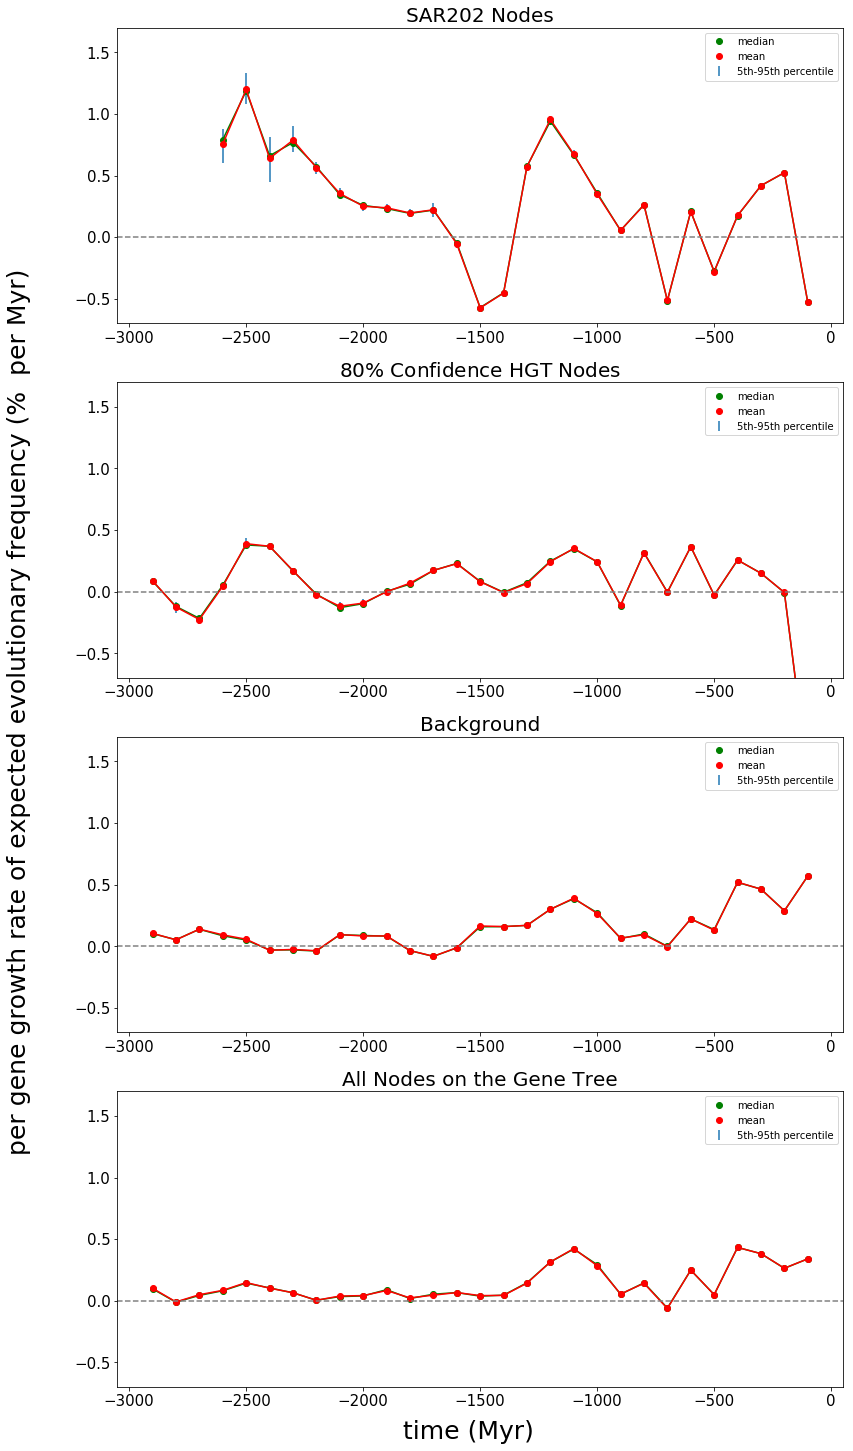

In [131]:
plt.figure(figsize=(15,30))

#HighConfidenceHGT_array_middle_age_interval = np.linspace(min(HighConfidence_middle_age_interval_list[0:len(HighConfidenceHGT_array_middle_age_interval)-1]), 0 , 5000)
SAR_x = np.linspace(min(SAR202_middle_age_interval_list[0:len(SAR202_middle_age_interval_list)-1]), 0 , 5000)
NonHighConfidenceHGT_x = np.linspace(min(NonBoth_middle_age_interval_list[0:len(NonBoth_middle_age_interval_list)-1]), 0 , 5000)

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(13,25))
plt.tick_params(labelcolor='none', top=False, bottom=True, left=False, right=False)

plt.subplot(4,1,1)
plt.plot(SAR202_middle_age_interval_list, SAR202Rate_Median_list, '-', color='green')
plt.plot(SAR202_middle_age_interval_list, SAR202Rate_Median_list,  'o', color='green', label="median")
plt.plot(SAR202_middle_age_interval_list, SAR202Rate_Mean_list, '-', color='red')
plt.plot(SAR202_middle_age_interval_list, SAR202Rate_Mean_list,  'o', color='red', label="mean")
SAR202_lower_bound = (np.asarray(SAR202Rate_Mean_list) - np.asarray(SAR202Rate_Confidence_LowerBound_list)).tolist()
SAR202_upper_bound = (np.asarray(SAR202Rate_Confidence_UpperBound_list) - np.asarray(SAR202Rate_Mean_list)).tolist()
plt.errorbar(SAR202_middle_age_interval_list, SAR202Rate_Mean_list, yerr=[SAR202_lower_bound, SAR202_upper_bound], linestyle='',label="5th-95th percentile")
#plt.fill_between(SAR202_middle_age_interval_list, SAR202Rate_Confidence_LowerBound_list, SAR202Rate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.ylim(-0.7, 1.7)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('SAR202 Nodes',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)

plt.subplot(4,1,2)
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Median_list, '-', color='green')
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Median_list,  'o', color='green', label="median")
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Mean_list, '-', color='red')
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Mean_list,  'o', color='red', label="mean")
HighConfidence_lower_bound = (np.asarray(HighConfidenceRate_Mean_list) - np.asarray(HighConfidenceRate_Confidence_LowerBound_list)).tolist()
HighConfidence_upper_bound = (np.asarray(HighConfidenceRate_Confidence_UpperBound_list) - np.asarray(HighConfidenceRate_Mean_list)).tolist()
plt.errorbar(HighConfidence_middle_age_interval_list, HighConfidenceRate_Mean_list, yerr=[HighConfidence_lower_bound, HighConfidence_upper_bound], linestyle='',label="5th-95th percentile")
#plt.fill_between(HighConfidence_middle_age_interval_list, HighConfidenceRate_Confidence_LowerBound_list, HighConfidenceRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.ylim(-0.7, 1.7)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('$80\%$ Confidence HGT Nodes',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)

plt.subplot(4,1,3)
plt.plot(NonBoth_middle_age_interval_list, NonBothRate_Median_list, '-', color='green')
plt.plot(NonBoth_middle_age_interval_list, NonBothRate_Median_list,  'o', color='green', label="median")
plt.plot(NonBoth_middle_age_interval_list, NonBothRate_Mean_list, '-', color='red')
plt.plot(NonBoth_middle_age_interval_list, NonBothRate_Mean_list, 'o', color='red', label="mean")
NonBoth_lower_bound = (np.asarray(NonBothRate_Mean_list) - np.asarray(NonBothRate_Confidence_LowerBound_list)).tolist()
NonBoth_upper_bound = (np.asarray(NonBothRate_Confidence_UpperBound_list) - np.asarray(NonBothRate_Mean_list)).tolist()
plt.errorbar(HighConfidence_middle_age_interval_list, NonBothRate_Mean_list, yerr=[NonBoth_lower_bound, NonBoth_upper_bound], linestyle='',label="5th-95th percentile")
#plt.fill_between(NonBoth_middle_age_interval_list, NonBothRate_Confidence_LowerBound_list, NonBothRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.ylim(-0.7, 1.7)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Background',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)

plt.subplot(4,1,4)
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Median_list, '-', color='green')
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Median_list,  'o', color='green', label="median")
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Mean_list, '-', color='red')
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Mean_list,  'o', color='red', label="mean")
AllNotes_lower_bound = (np.asarray(AllRate_Mean_list) - np.asarray(AllRate_Confidence_LowerBound_list)).tolist()
AllNotes_upper_bound = (np.asarray(AllRate_Confidence_UpperBound_list) - np.asarray(AllRate_Mean_list)).tolist()
plt.errorbar(HighConfidence_middle_age_interval_list, AllRate_Mean_list, yerr=[AllNotes_lower_bound, AllNotes_upper_bound], linestyle='',label="5th-95th percentile")
#plt.fill_between(HighConfidence_middle_age_interval_list, AllRate_Confidence_LowerBound_list, AllRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.ylim(-0.7, 1.7)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('All Nodes on the Gene Tree',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)

fig.text(0.5, 0.1, 'time (Myr)', va='center', ha='center' ,  size = '25')
fig.text(0.02, 0.5, 'per gene growth rate of expected evolutionary frequency (%  per Myr)', va='center', ha='center', rotation='vertical', size = '25')

plt.show()

<Figure size 1080x2160 with 0 Axes>

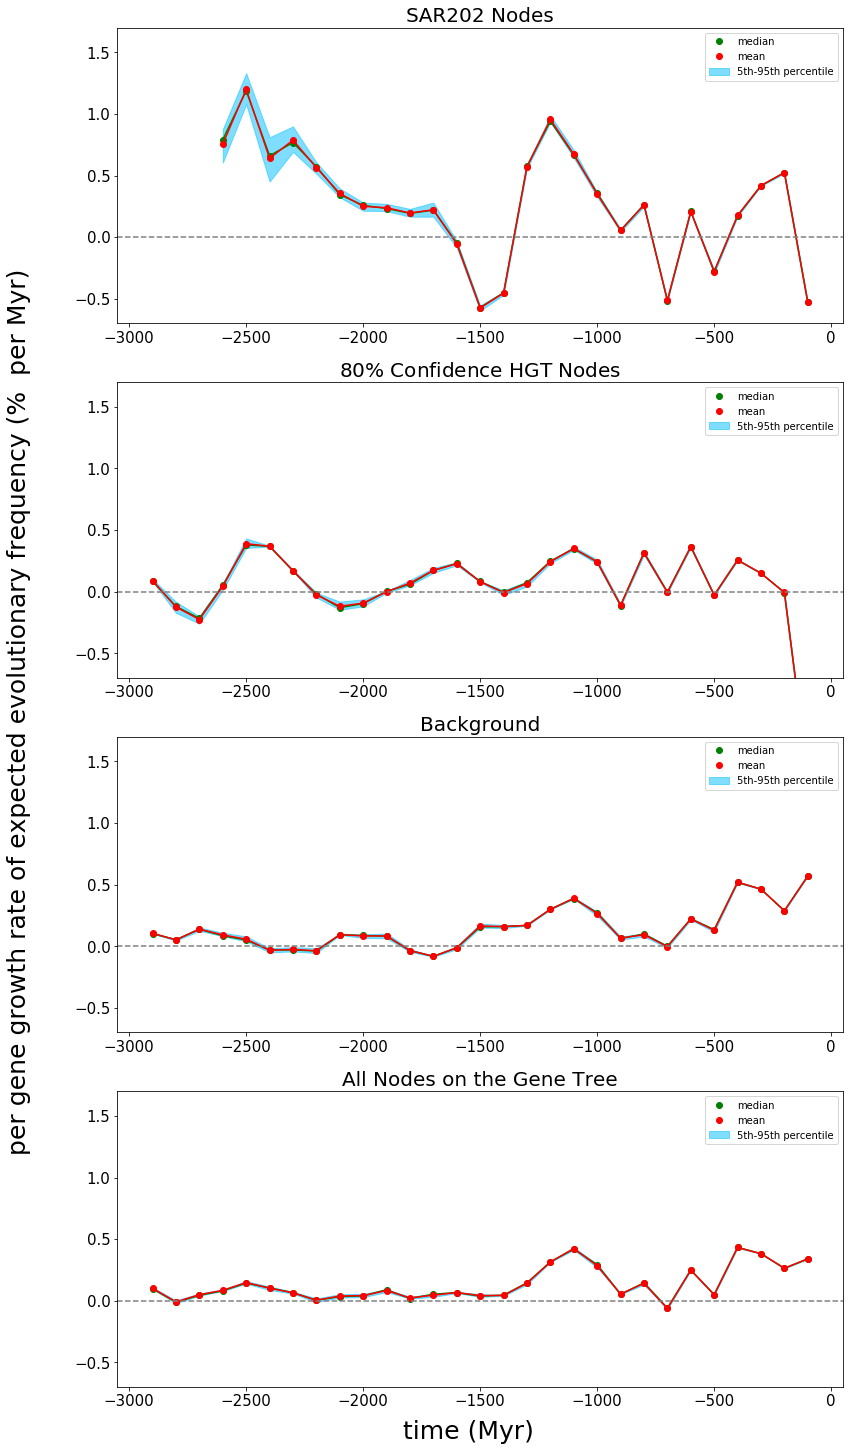

In [117]:
plt.figure(figsize=(15,30))

#HighConfidenceHGT_array_middle_age_interval = np.linspace(min(HighConfidence_middle_age_interval_list[0:len(HighConfidenceHGT_array_middle_age_interval)-1]), 0 , 5000)
SAR_x = np.linspace(min(SAR202_middle_age_interval_list[0:len(SAR202_middle_age_interval_list)-1]), 0 , 5000)
NonHighConfidenceHGT_x = np.linspace(min(NonBoth_middle_age_interval_list[0:len(NonBoth_middle_age_interval_list)-1]), 0 , 5000)

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(13,25))
plt.tick_params(labelcolor='none', top=False, bottom=True, left=False, right=False)

plt.subplot(4,1,1)
plt.plot(SAR202_middle_age_interval_list, SAR202Rate_Median_list, '-', color='green')
plt.plot(SAR202_middle_age_interval_list, SAR202Rate_Median_list,  'o', color='green', label="median")
plt.plot(SAR202_middle_age_interval_list, SAR202Rate_Mean_list, '-', color='red')
plt.plot(SAR202_middle_age_interval_list, SAR202Rate_Mean_list,  'o', color='red', label="mean")
#SAR202_lower_bound = (np.asarray(SAR202Rate_Mean_list) - np.asarray(SAR202Rate_Confidence_LowerBound_list)).tolist()
#SAR202_upper_bound = (np.asarray(SAR202Rate_Confidence_UpperBound_list) - np.asarray(SAR202Rate_Mean_list)).tolist()
#plt.errorbar(SAR202_middle_age_interval_list, SAR202Rate_Mean_list, yerr=[SAR202_lower_bound, SAR202_upper_bound], linestyle='',label="5th-95th percentile")
plt.fill_between(SAR202_middle_age_interval_list, SAR202Rate_Confidence_LowerBound_list, SAR202Rate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.ylim(-0.7, 1.7)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('SAR202 Nodes',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)

plt.subplot(4,1,2)
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Median_list, '-', color='green')
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Median_list,  'o', color='green', label="median")
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Mean_list, '-', color='red')
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Mean_list,  'o', color='red', label="mean")
#HighConfidence_lower_bound = (np.asarray(HighConfidenceRate_Mean_list) - np.asarray(HighConfidenceRate_Confidence_LowerBound_list)).tolist()
#HighConfidence_upper_bound = (np.asarray(HighConfidenceRate_Confidence_UpperBound_list) - np.asarray(HighConfidenceRate_Mean_list)).tolist()
#plt.errorbar(HighConfidence_middle_age_interval_list, HighConfidenceRate_Mean_list, yerr=[HighConfidence_lower_bound, HighConfidence_upper_bound], linestyle='',label="5th-95th percentile")
plt.fill_between(HighConfidence_middle_age_interval_list, HighConfidenceRate_Confidence_LowerBound_list, HighConfidenceRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.ylim(-0.7, 1.7)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('$80\%$ Confidence HGT Nodes',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)

plt.subplot(4,1,3)
plt.plot(NonBoth_middle_age_interval_list, NonBothRate_Median_list, '-', color='green')
plt.plot(NonBoth_middle_age_interval_list, NonBothRate_Median_list,  'o', color='green', label="median")
plt.plot(NonBoth_middle_age_interval_list, NonBothRate_Mean_list, '-', color='red')
plt.plot(NonBoth_middle_age_interval_list, NonBothRate_Mean_list, 'o', color='red', label="mean")
#NonBoth_lower_bound = (np.asarray(NonBothRate_Mean_list) - np.asarray(NonBothRate_Confidence_LowerBound_list)).tolist()
#NonBoth_upper_bound = (np.asarray(NonBothRate_Confidence_UpperBound_list) - np.asarray(NonBothRate_Mean_list)).tolist()
#plt.errorbar(HighConfidence_middle_age_interval_list, NonBothRate_Mean_list, yerr=[NonBoth_lower_bound, NonBoth_upper_bound], linestyle='',label="5th-95th percentile")
plt.fill_between(NonBoth_middle_age_interval_list, NonBothRate_Confidence_LowerBound_list, NonBothRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.ylim(-0.7, 1.7)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Background',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)

plt.subplot(4,1,4)
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Median_list, '-', color='green')
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Median_list,  'o', color='green', label="median")
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Mean_list, '-', color='red')
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Mean_list,  'o', color='red', label="mean")
#AllNotes_lower_bound = (np.asarray(AllRate_Mean_list) - np.asarray(AllRate_Confidence_LowerBound_list)).tolist()
#AllNotes_upper_bound = (np.asarray(AllRate_Confidence_UpperBound_list) - np.asarray(AllRate_Mean_list)).tolist()
#plt.errorbar(HighConfidence_middle_age_interval_list, AllRate_Mean_list, yerr=[AllNotes_lower_bound, AllNotes_upper_bound], linestyle='',label="5th-95th percentile")
plt.fill_between(HighConfidence_middle_age_interval_list, AllRate_Confidence_LowerBound_list, AllRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.ylim(-0.7, 1.7)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('All Nodes on the Gene Tree',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)

fig.text(0.5, 0.1, 'time (Myr)', va='center', ha='center' ,  size = '25')
fig.text(0.02, 0.5, 'per gene growth rate of expected evolutionary frequency (%  per Myr)', va='center', ha='center', rotation='vertical', size = '25')

plt.show()